<a href="https://colab.research.google.com/github/ankithmanchale/Deep-Learning/blob/main/rice_img.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.metrics import classification_report
import random
import os
import splitfolders
import seaborn as sns

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, models

In [4]:
Data_Path ="/content/drive/MyDrive/Colab Notebooks/Dataset/Rice_Image_Dataset/"  # locatoin of the Rice Image Dataset
os.listdir(Data_Path)

['Arborio',
 'Basmati',
 'Ipsala',
 'Jasmine',
 'Karacadag',
 'Rice_Citation_Request.txt']

In [9]:
!pip install split_folder

from tensorflow.keras.preprocessing.image import ImageDataGenerator
import split_folder
datagen = ImageDataGenerator(rescale=1./255)

split_folder.ratio(Data_Path, output='Rice_Image_Train_Validation_Test', seed=42, ratio=(.7, .2, .1), group_prefix=None)


Copying (10500) of .. train/Arborio



Copying files: 156 files [07:31,  2.90s/ files]


  0%|          | 0/10500 [00:00<?, ?it/s]


Copying (3000) of .. val/Arborio



  0%|          | 0/3000 [00:00<?, ?it/s]


Copying (1500) of .. test/Arborio



  0%|          | 0/1500 [00:00<?, ?it/s]


Copying (10195) of .. train/Basmati



  0%|          | 0/10195 [00:00<?, ?it/s]


Copying (2913) of .. val/Basmati



  0%|          | 0/2913 [00:00<?, ?it/s]


Copying (1457) of .. test/Basmati



  0%|          | 0/1457 [00:00<?, ?it/s]


Copying (0) of .. train/Ipsala



0it [00:00, ?it/s]


Copying (0) of .. val/Ipsala



0it [00:00, ?it/s]


Copying (0) of .. test/Ipsala



0it [00:00, ?it/s]


Copying (0) of .. train/Jasmine



0it [00:00, ?it/s]


Copying (0) of .. val/Jasmine



0it [00:00, ?it/s]


Copying (0) of .. test/Jasmine



0it [00:00, ?it/s]


Copying (0) of .. train/Karacadag



0it [00:00, ?it/s]


Copying (0) of .. val/Karacadag



0it [00:00, ?it/s]


Copying (0) of .. test/Karacadag



0it [00:00, ?it/s]

In [30]:
Batch_Size = 20
Image_Size = (160, 160)
train_dir = 'Rice_Image_Train_Validation_Test/train'
validation_dir = 'Rice_Image_Train_Validation_Test/val'
test_dir = 'Rice_Image_Train_Validation_Test/test'

Train = keras.utils.image_dataset_from_directory(
    directory = train_dir,
    labels = 'inferred',
    label_mode = 'int',
    batch_size = Batch_Size,
    image_size = Image_Size,
    seed = 42,
)


Validation = keras.utils.image_dataset_from_directory(
    directory = validation_dir,
    labels = 'inferred',
    label_mode = 'int',
    batch_size = Batch_Size,
    image_size = Image_Size,
    seed = 42,
)


Test = keras.utils.image_dataset_from_directory(
    directory = test_dir,
    labels = 'inferred',
    label_mode = 'int',
    batch_size = Batch_Size,
    image_size = Image_Size,
    seed = 42,
)

Found 20695 files belonging to 5 classes.
Found 5913 files belonging to 5 classes.
Found 2957 files belonging to 5 classes.


In [31]:
# check the classes in Train, Validation and Test set
print(f"The Train Set has {len(Train.class_names)} classes: {Train.class_names}")
print(f"The Validation Set has {len(Validation.class_names)} classes: {Validation.class_names}")
print(f"The Test Set has {len(Test.class_names)} classes: {Test.class_names}")

The Train Set has 5 classes: ['Arborio', 'Basmati', 'Ipsala', 'Jasmine', 'Karacadag']
The Validation Set has 5 classes: ['Arborio', 'Basmati', 'Ipsala', 'Jasmine', 'Karacadag']
The Test Set has 5 classes: ['Arborio', 'Basmati', 'Ipsala', 'Jasmine', 'Karacadag']


In [32]:
# check the shapes of Images and labels
for images, labels in Train:
    print(f"Train DataSet: Images Shape: {images.shape} , Labels Shape: {labels.shape} ")
    break
for image, labels in Validation:
    print(f"Validation DataSet: Images Shape: {images.shape} , Labels Shape: {labels.shape} ")
    break
for image, labels in Test:
    print(f"Test DataSet: Images Shape: {images.shape} , Labels Shape: {labels.shape} ")
    break

Train DataSet: Images Shape: (20, 160, 160, 3) , Labels Shape: (20,) 
Validation DataSet: Images Shape: (20, 160, 160, 3) , Labels Shape: (20,) 
Test DataSet: Images Shape: (20, 160, 160, 3) , Labels Shape: (20,) 


In [33]:
# check the classes in each set
for i in [Train, Validation, Test]:
    class_names = i.class_names
    print(class_names)

['Arborio', 'Basmati', 'Ipsala', 'Jasmine', 'Karacadag']
['Arborio', 'Basmati', 'Ipsala', 'Jasmine', 'Karacadag']
['Arborio', 'Basmati', 'Ipsala', 'Jasmine', 'Karacadag']


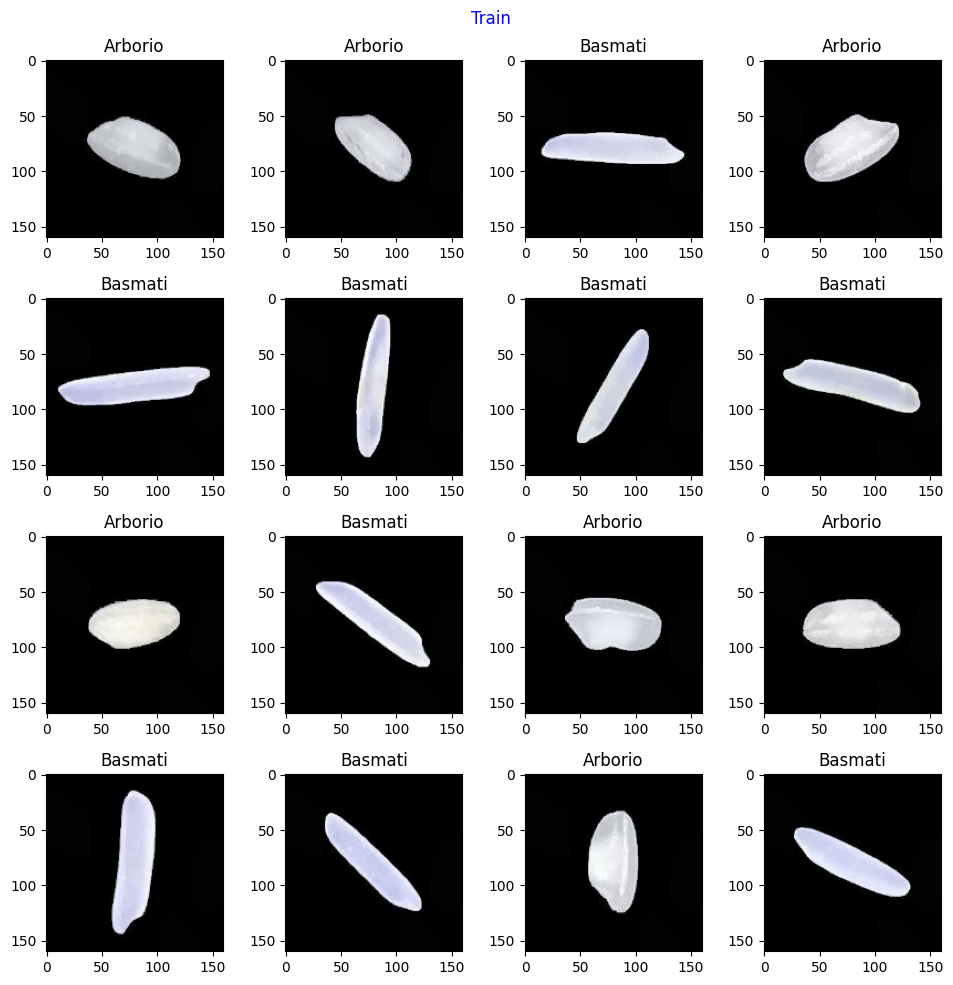

In [34]:
# visualizing some samples in the Train set
plt.figure(figsize=(10, 10))
for images, labels in Train.take(1):
    for i in range(16):
        ax = plt.subplot(4, 4, i + 1)
        plt.imshow(images[i].numpy().astype("uint32"))
        plt.title(class_names[labels[i]])
        plt.tight_layout()
        plt.suptitle('Train', color='blue')
plt.show()

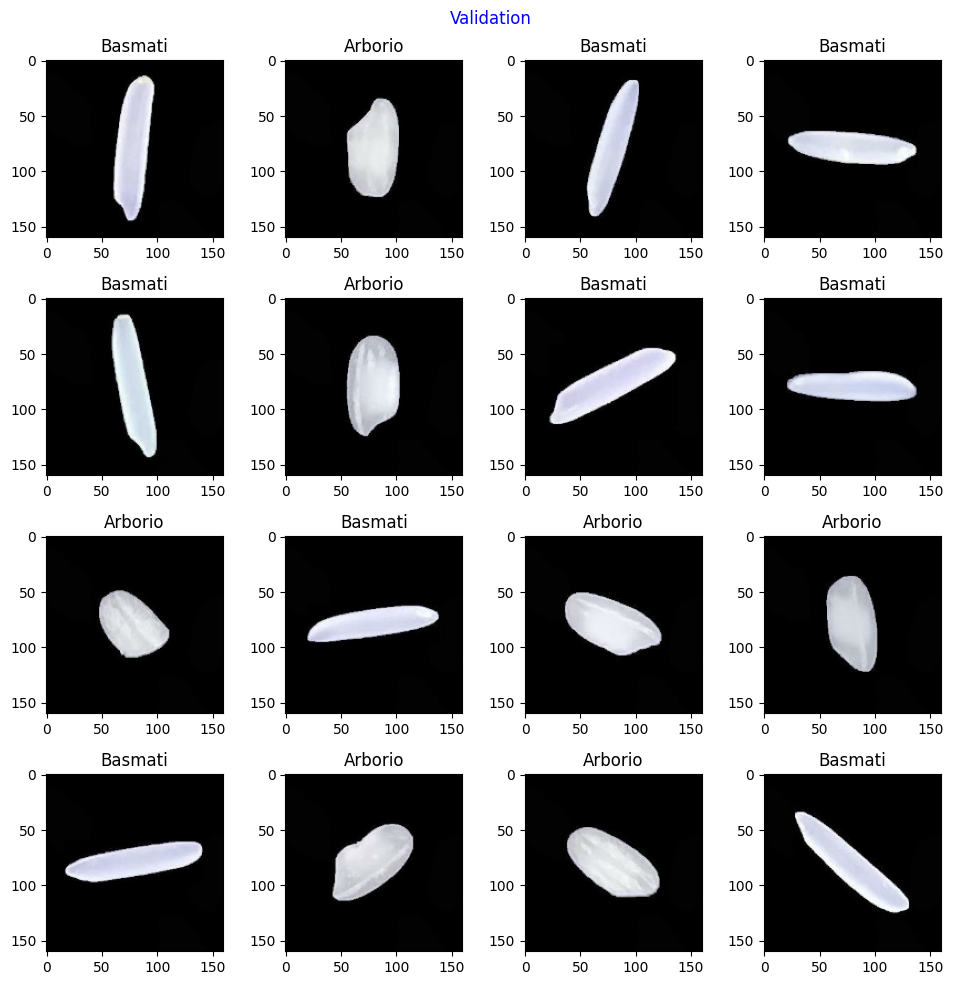

In [35]:
# visualizing some samples in the Validation set
plt.figure(figsize=(10, 10))
for images, labels in Validation.take(1):
    for i in range(16):
        ax = plt.subplot(4, 4, i + 1)
        plt.imshow(images[i].numpy().astype("uint16"))
        plt.title(class_names[labels[i]])
        plt.tight_layout()
        plt.suptitle('Validation', color='blue')
plt.show()

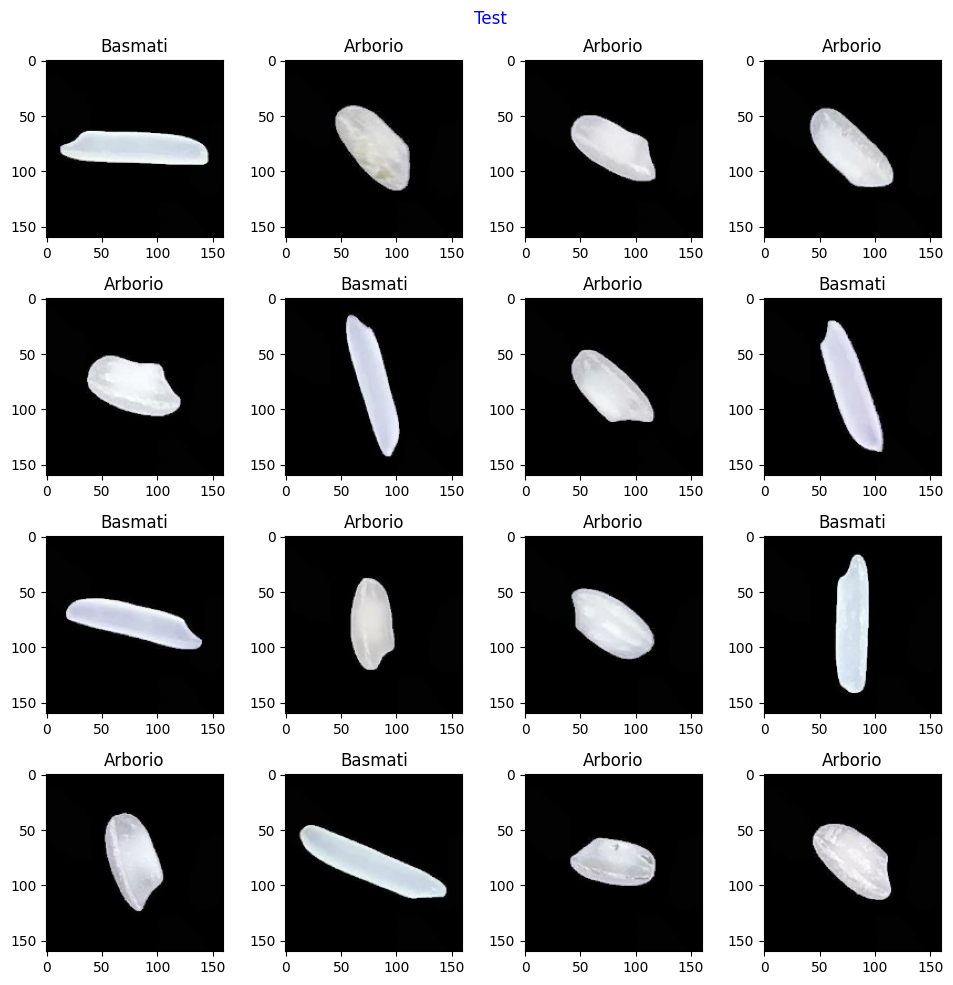

In [36]:
# visualizing some samples in the Test set
plt.figure(figsize=(10, 10))
for images, labels in Test.take(1):
    for i in range(16):
        ax = plt.subplot(4, 4, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(class_names[labels[i]])
        plt.tight_layout()
        plt.suptitle('Test', color='blue')
plt.show()

In [39]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.regularizers import l2
from tensorflow.keras.preprocessing import image_dataset_from_directory
# Initialize the model
model = Sequential()
learning_rate = 0.001
momentum = 0.9

# Adding 4 Conv2D + Pooling layers with L2 regularization
model.add(Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(160, 160, 3), kernel_regularizer=l2(0.01)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu', kernel_regularizer=l2(0.01)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(filters=128, kernel_size=(3, 3), activation='relu', kernel_regularizer=l2(0.01)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(filters=256, kernel_size=(3, 3), activation='relu', kernel_regularizer=l2(0.01)))
model.add(MaxPooling2D(pool_size=(2, 2)))

# Flatten the output
model.add(Flatten())

# Add 3 fully connected (Dense) layers
model.add(Dense(512, activation='relu', kernel_regularizer=l2(0.01)))
model.add(Dropout(0.25))  # Adding dropout to prevent overfitting
model.add(Dense(256, activation='relu', kernel_regularizer=l2(0.01)))
model.add(Dropout(0.25))  # Adding dropout to prevent overfitting
model.add(Dense(5, activation='softmax'))  # Output layer with 5 classes

# Compile the model using Adam optimizer
model.compile(
    optimizer=Adam(learning_rate=learning_rate),  # ADAM optimizer with LR=0.001
    loss='categorical_crossentropy',              # Categorical loss
    metrics=['accuracy']
)

model.compile(optimizer='adam', loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])

early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=5,
    restore_best_weights=True
)
history = model.fit(
    x=Train,
    validation_data=Validation,
    epochs=50,
    callbacks=[early_stopping]
)
# Print model summary
model.summary()

Epoch 1/50
1035/1035 ━━━━━━━━━━━━━━━━━━━━ 53s 39ms/step - accuracy: 0.9701 - loss: 8.7981 - val_accuracy: 0.9986 - val_loss: 1.3345
Epoch 2/50
1035/1035 ━━━━━━━━━━━━━━━━━━━━ 56s 23ms/step - accuracy: 0.9976 - loss: 1.0007 - val_accuracy: 0.9970 - val_loss: 0.4227
Epoch 3/50
1035/1035 ━━━━━━━━━━━━━━━━━━━━ 27s 26ms/step - accuracy: 0.9964 - loss: 0.3406 - val_accuracy: 0.9993 - val_loss: 0.1580
Epoch 4/50
1035/1035 ━━━━━━━━━━━━━━━━━━━━ 25s 24ms/step - accuracy: 0.9972 - loss: 0.1352 - val_accuracy: 0.9985 - val_loss: 0.0799
Epoch 5/50
1035/1035 ━━━━━━━━━━━━━━━━━━━━ 26s 25ms/step - accuracy: 0.9981 - loss: 0.0647 - val_accuracy: 0.9985 - val_loss: 0.0509
Epoch 6/50
1035/1035 ━━━━━━━━━━━━━━━━━━━━ 40s 24ms/step - accuracy: 0.9960 - loss: 0.0523 - val_accuracy: 0.9995 - val_loss: 0.0336
Epoch 7/50
1035/1035 ━━━━━━━━━━━━━━━━━━━━ 41s 24ms/step - accuracy: 0.9982 - loss: 0.0335 - val_accuracy: 0.9985 - val_loss: 0.0295
Epoch 8/50
1035/1035 ━━━━━━━━━━━━━━━━━━━━ 41s 24ms/step - accuracy: 0.9981 -

Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_18 (Conv2D)                   │ (None, 158, 158, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_18 (MaxPooling2D)      │ (None, 79, 79, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_19 (Conv2D)                   │ (None, 77, 77, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_19 (MaxPooling2D)      │ (None, 38, 38, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_20 (Conv2D)                   │ (None, 36, 36, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_20 (MaxPooling2D)      │ (None, 18, 18, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_21 (Conv2D)                   │ (None, 16, 16, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_21 (MaxPooling2D)      │ (None, 8, 8, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_6 (Flatten)                  │ (None, 16384)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_16 (Dense)                     │ (None, 512)                 │       8,389,120 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_8 (Dropout)                  │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_17 (Dense)                     │ (None, 256)                 │         131,328 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_9 (Dropout)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_18 (Dense)                     │ (None, 5)                   │           1,285 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 26,730,449 (101.97 MB)

 Trainable params: 8,910,149 (33.99 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 17,820,300 (67.98 MB)

In [40]:
model.summary()

Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_18 (Conv2D)                   │ (None, 158, 158, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_18 (MaxPooling2D)      │ (None, 79, 79, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_19 (Conv2D)                   │ (None, 77, 77, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_19 (MaxPooling2D)      │ (None, 38, 38, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_20 (Conv2D)                   │ (None, 36, 36, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_20 (MaxPooling2D)      │ (None, 18, 18, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_21 (Conv2D)                   │ (None, 16, 16, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_21 (MaxPooling2D)      │ (None, 8, 8, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_6 (Flatten)                  │ (None, 16384)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_16 (Dense)                     │ (None, 512)                 │       8,389,120 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_8 (Dropout)                  │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_17 (Dense)                     │ (None, 256)                 │         131,328 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_9 (Dropout)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_18 (Dense)                     │ (None, 5)                   │           1,285 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 26,730,449 (101.97 MB)

 Trainable params: 8,910,149 (33.99 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 17,820,300 (67.98 MB)

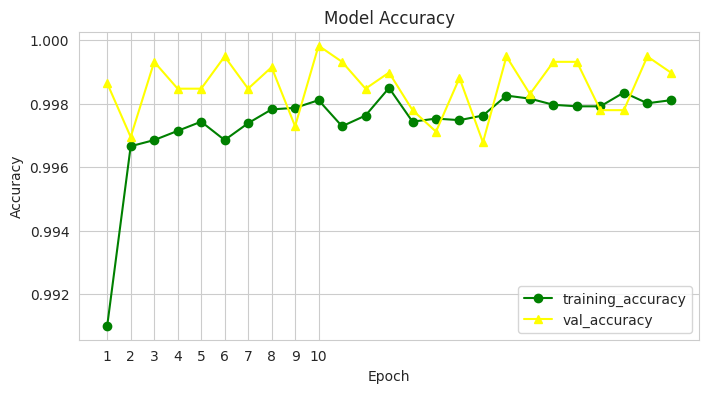

In [42]:
training_accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
training_loss = history.history['loss']
val_loss = history.history['val_loss']
# plotting the training and validation Accuracy values over 10 training epochs
plt.figure(figsize=(8,4))
sns.set_style('whitegrid')
epoch_count = range(1, len(training_accuracy) + 1)
plt.plot(epoch_count , training_accuracy , color='green' , marker = 'o')
plt.plot(epoch_count , val_accuracy , color='yellow' , marker = '^')
plt.legend(['training_accuracy' , 'val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.xticks(np.arange(1,11,1))
plt.show()